In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

plt.style.use('ggplot')

## Importing Data Sets

In [2]:
# Training data sets
train_beneficiarydata = pd.read_csv("./healthCareData/train_beneficiarydata.csv")
train_inpatientdata = pd.read_csv("./healthCareData/train_inpatientdata.csv")
train_outpatientdata = pd.read_csv("./healthCareData/train_outpatientdata.csv")
train_potentialfraud = pd.read_csv("./healthCareData/train_potentialfraud.csv")

# Testing data sets
test_beneficiarydata = pd.read_csv("./healthCareData/test_beneficiarydata.csv")
test_inpatientdata = pd.read_csv("./healthCareData/test_inpatientdata.csv")
test_outpatientdata = pd.read_csv("./healthCareData/test_outpatientdata.csv")
test_potentialfraud = pd.read_csv("./healthCareData/test_potentialfraud.csv")


In [3]:
# Create columns for inpatient and outpatient data.
train_inpatientdata['patientType'] = np.repeat('inpatient', len(train_inpatientdata))
train_outpatientdata['patientType'] = np.repeat('outpatient', len(train_outpatientdata))

train_inpatientdata['patientType'] = np.repeat('inpatient', len(train_inpatientdata))
train_outpatientdata['patientType'] = np.repeat('outpatient', len(train_outpatientdata))


In [4]:
# Combining the inpatient and outpatient data
patient = pd.concat([train_inpatientdata, train_outpatientdata], axis=0)
patient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,patientType
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,inpatient
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,inpatient
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,inpatient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient


In [5]:
full_data = pd.merge(patient, train_beneficiarydata, on='BeneID', how='left')
full_data = pd.merge(full_data, train_potentialfraud, on='Provider', how='left')
full_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,1,2,2,1,2,0,0,5470,1870,No


## Warmup Question 1

### How many medical doctors are there in the train outpatient dataset?

In [6]:
print(full_data.loc[full_data.patientType=='outpatient'].AttendingPhysician.unique().shape[0])


74110


### How many medical doctors are there in the train inpatient dataset? Do they match with those from the outpatient record?

In [7]:
print(full_data.loc[full_data.patientType=='inpatient'].AttendingPhysician.unique().shape[0])


11605


### Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients, or do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.

- Most doctors have a connection of 1 clinic.

In [8]:
physician= full_data.groupby(['AttendingPhysician','Provider'])['Provider'].count().\
reset_index(name='NumProvider').groupby(['AttendingPhysician'])['NumProvider'].count().reset_index()

print(physician.NumProvider.value_counts())


1    76844
2     4741
3      382
4       65
5       19
6        9
9        1
8        1
7        1
Name: NumProvider, dtype: int64


Text(0, 0.5, 'number of doctors per provider')

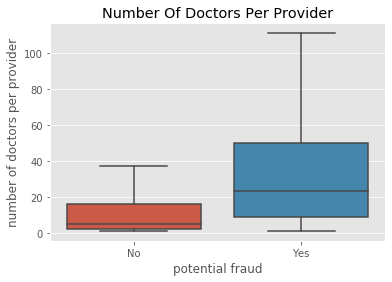

In [9]:
doctors = full_data.groupby(['Provider', 'AttendingPhysician'])['AttendingPhysician'].count().reset_index(name='NumOfDoctors').\
groupby('Provider')['NumOfDoctors'].count().reset_index()

doctors2 = pd.merge(doctors, train_potentialfraud, on='Provider', how='left')


sns.boxplot(x='PotentialFraud', y='NumOfDoctors', data=doctors2, showfliers=False)
plt.title('Number Of Doctors Per Provider')
plt.xlabel('potential fraud')
plt.ylabel('number of doctors per provider')

### How many distinct patients (BeneIDs) are there in the in/out-patient datasets?

- There are 31,289 inpatients and 133,980 outpatients

In [10]:
print(full_data.loc[full_data.patientType=='inpatient'].BeneID.unique().shape[0])
print(full_data.loc[full_data.patientType=='outpatient'].BeneID.unique().shape[0])


31289
133980


### Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?

- We can characterize these patients by the number of providers they have. We can generate a new feature providers per patient.

In [11]:
patient = full_data.groupby(['BeneID', 'Provider', 'PotentialFraud'])['BeneID'].count().reset_index(name='NumProvider').\
groupby(['BeneID', 'PotentialFraud'])['NumProvider'].count().reset_index()


Text(0.5, 1.0, 'Proportion of Providers Per Patient')

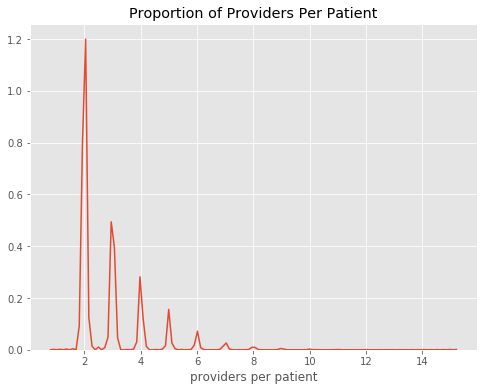

In [12]:
plt.subplots(figsize=(8,6))
sns.distplot(patient['NumProvider'], hist=False)
plt.xlabel('providers per patient')
plt.title('Proportion of Providers Per Patient')

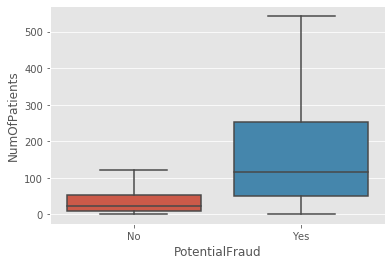

In [13]:
patients = full_data.groupby(['Provider', 'BeneID'])['BeneID'].count().reset_index(name='NumOfPatients').\
groupby('Provider')['NumOfPatients'].count().reset_index()

provider_patient= pd.merge(patients, train_potentialfraud, on='Provider', how='left')

sns.boxplot(x='PotentialFraud', y='NumOfPatients', data=provider_patient, showfliers=False)


### How does providers' number of doctors and patients help detect fraud?

In [154]:
doctors= full_data.groupby(['Provider', 'AttendingPhysician'])['AttendingPhysician'].count().\
reset_index(name='NumOfDoctors').groupby('Provider')['NumOfDoctors'].count().reset_index()
 
trainProvider = pd.merge(train_potentialfraud, doctors, on='Provider')

In [155]:
patient= full_data.groupby(['Provider','BeneID'])['BeneID'].count().reset_index(name='NumOfPatients').\
groupby('Provider')['NumOfPatients'].count().reset_index()

trainProvider2 = pd.merge(trainProvider, patient, on='Provider')

Text(0, 0.5, 'Number of Patients')

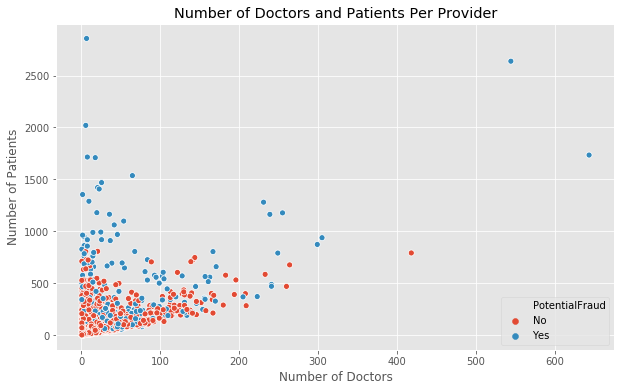

In [187]:
f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='NumOfDoctors', y='NumOfPatients', data=trainProvider2, hue='PotentialFraud')
plt.title('Number of Doctors and Patients Per Provider')
plt.xlabel('Number of Doctors')
plt.ylabel('Number of Patients')

### Do those inpatients show worse health conditions (in terms of chronic diseases) than typical outpatients?

Text(0.5, 0, 'type of patient')

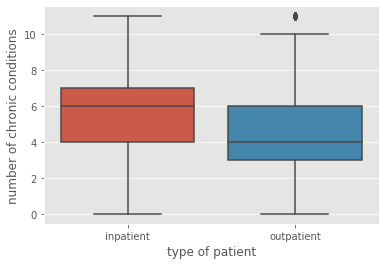

In [157]:
patientChronic = full_data.filter(regex='Chronic').replace(to_replace=2, value=0).sum(axis=1).\
reset_index(name='NumChronicCond')

chronicCond = pd.concat([patientChronic,full_data[['patientType', 'BeneID', 'ClaimID', 'PotentialFraud']]], axis =1)

sns.boxplot(x='patientType', y='NumChronicCond',  data=chronicCond)
plt.ylabel('number of chronic conditions')
plt.xlabel('type of patient')
                       

### Do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.

In [158]:
patientChronic = full_data.filter(regex='Chronic').replace(to_replace=2, value=0).sum(axis=1).\
reset_index(name='NumChronicCond')

chronic = pd.concat([patientChronic, full_data[['Provider', 'ClaimID']]], axis=1)

a= chronic.groupby(['Provider', 'NumChronicCond'])['ClaimID'].count().reset_index(name='TotClaims').\
groupby('Provider')[['NumChronicCond', 'TotClaims']].mean().reset_index()

b = pd.merge(a, train_potentialfraud, on='Provider', how='left')


b_no = b.loc[b.PotentialFraud=='No']
b_yes= b.loc[b.PotentialFraud=='Yes']


Text(0, 0.5, 'Number of Claims')

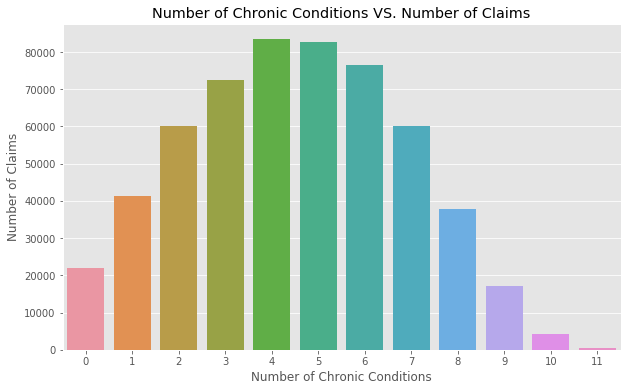

In [186]:
chronic2 = chronic.groupby(['NumChronicCond'])['ClaimID'].count().reset_index(name='NumClaims')
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='NumChronicCond', y='NumClaims', data=chronic2)
plt.title('Number of Chronic Conditions VS. Number of Claims')
plt.xlabel('Number of Chronic Conditions')
plt.ylabel('Number of Claims')

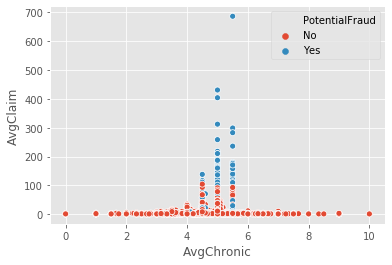

In [160]:
m = chronic.groupby(['Provider', 'NumChronicCond'])['ClaimID'].count().reset_index(name='NumClaims').\
groupby('Provider').agg({'NumChronicCond':'mean', 'NumClaims':'mean'}).reset_index().\
rename(columns={'NumChronicCond':'AvgChronic', 'NumClaims':'AvgClaim'})

m= pd.merge(m, train_potentialfraud, on='Provider', how='left')

sns.scatterplot(x='AvgChronic', y='AvgClaim', data=m, hue='PotentialFraud')

### Do the same providers provide both inpatient and outpatient services? Summarize your finding.

- There are 1694 providers that offer both services
- There are 398 providers that offer inpatient services only
- There are 3318 providers thar offer outpatient services only

In [161]:
a = full_data.groupby(['Provider', 'patientType'])['BeneID'].count().reset_index(name='count').\
drop('count', axis=1)

a_list= list(zip(a.Provider, a.patientType))

providerDict= {}

for ele in a_list:
    if ele[0] not in providerDict:
        providerDict[ele[0]]= ele[1]    
    else:
        providerDict[ele[0]] = 'both'
        

providerService = pd.DataFrame(providerDict.keys(), providerDict.values()).reset_index().\
rename(columns={'index':'ServiceType', 0:'Provider'})


In [162]:
serviceFraud = pd.merge(train_potentialfraud, providerService, on='Provider')
serviceFraud.groupby('ServiceType')['Provider'].count()

ServiceType
both          1694
inpatient      398
outpatient    3318
Name: Provider, dtype: int64

- Providers that offer only outpatient service have a low chance of commiting fraud. While providers that offer both services have a greater chance of commiting healthcare fraud.

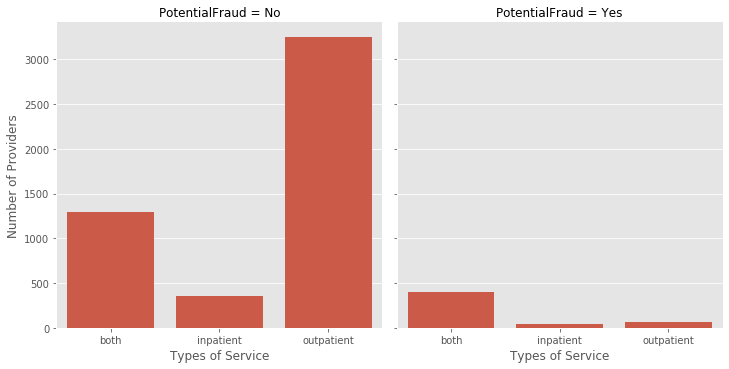

In [195]:
serviceFraud = pd.merge(train_potentialfraud, providerService, on='Provider')

service = serviceFraud.groupby(['ServiceType', 'PotentialFraud'])['Provider'].count().reset_index(name='count')

g = sns.FacetGrid(service, col="PotentialFraud", height = 5)
g.map_dataframe(sns.barplot, x="ServiceType", y="count")
g.set_axis_labels("Types of Service", "Number of Providers")


## Warmup Question 2

### Study the relationship between the patient ages (at the time of their service) and the counts of medical claims.

In [108]:
# Calculating the age of the patient at the time of their service
full_data['ClaimStartDt'] =  pd.to_datetime(full_data['ClaimStartDt'], format='%Y/%m/%d')
full_data['DOB'] =  pd.to_datetime(full_data['DOB'], format='%Y/%m/%d')
full_data['AgeWhenServed'] = full_data['ClaimStartDt'] - full_data['DOB']


In [109]:
# Converting the unit of AgeWhenServed to year from days
full_data['AgeWhenServed'] = full_data['AgeWhenServed'] / np.timedelta64(1, 'Y')
full_data['AgeWhenServed']

0         66.279253
1         66.665298
2         66.711842
3         94.961567
4         71.369022
            ...    
558206    57.348200
558207    57.411172
558208    57.482358
558209    57.548067
558210    57.630205
Name: AgeWhenServed, Length: 558211, dtype: float64

In [110]:
# Converting AgeWhenServed to int from float
full_data['AgeWhenServed'] = full_data['AgeWhenServed'].fillna(-1)
full_data['AgeWhenServed'] = full_data['AgeWhenServed'].astype(int)
full_data['AgeWhenServed'] = full_data['AgeWhenServed'].replace(-1, np.nan)

full_data['AgeWhenServed']

0         66
1         66
2         66
3         94
4         71
          ..
558206    57
558207    57
558208    57
558209    57
558210    57
Name: AgeWhenServed, Length: 558211, dtype: int64

Text(0, 0.5, 'Number of Claims')

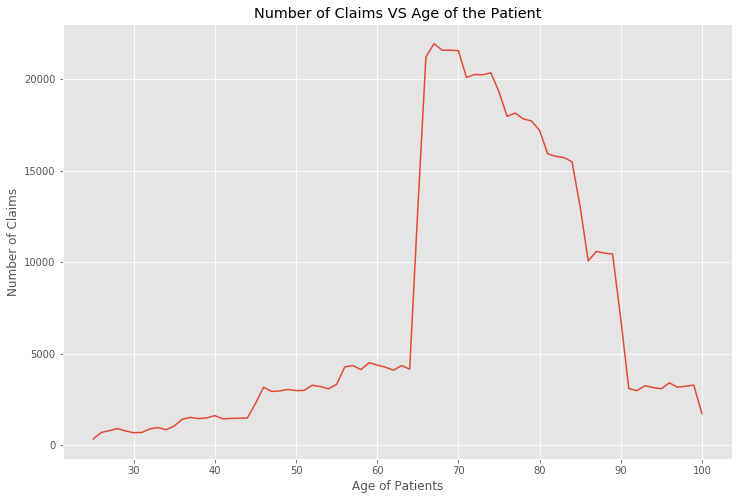

In [111]:
# Line graph of number of claims and age
ax1 = full_data.groupby('AgeWhenServed').agg({'ClaimID' : 'count'}).plot(figsize = (12, 8), title = 'Number of Claims VS Age of the Patient', legend = False)
ax1.set_xlabel("Age of Patients")
ax1.set_ylabel('Number of Claims')

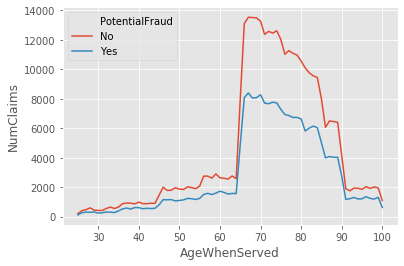

In [112]:
averageage = full_data.groupby(['PotentialFraud', 'AgeWhenServed'])['ClaimID'].count().reset_index(name = 'NumClaims')
averageage
sns.lineplot(data = averageage, x = 'AgeWhenServed', y = 'NumClaims', hue = 'PotentialFraud')


### Study the relationship between the patient age and their chornic conditions. Within the train-samples, do these chronic conditions show a definite trend with respect to increasing ages?

In [113]:
# Replacing 2 as 0 in ChronicCond columns and 'Y' in RenalDiseaseIndicator to 1
full_data = full_data.replace({'ChronicCond_Alzheimer' : 2, 
                               'ChronicCond_Heartfailure' : 2, 
                               'ChronicCond_KidneyDisease' : 2,
                               'ChronicCond_Cancer' : 2, 
                               'ChronicCond_ObstrPulmonary' : 2, 
                               'ChronicCond_Depression' : 2, 
                               'ChronicCond_Diabetes' : 2, 
                               'ChronicCond_IschemicHeart' : 2, 
                               'ChronicCond_Osteoporasis' : 2, 
                               'ChronicCond_rheumatoidarthritis' : 2, 
                               'ChronicCond_stroke' : 2}, 0)
full_data = full_data.replace({'RenalDiseaseIndicator' : 'Y'}, 1)
full_data['RenalDiseaseIndicator'] = full_data['RenalDiseaseIndicator'].astype(int)


Text(0, 0.5, 'Number of Claims')

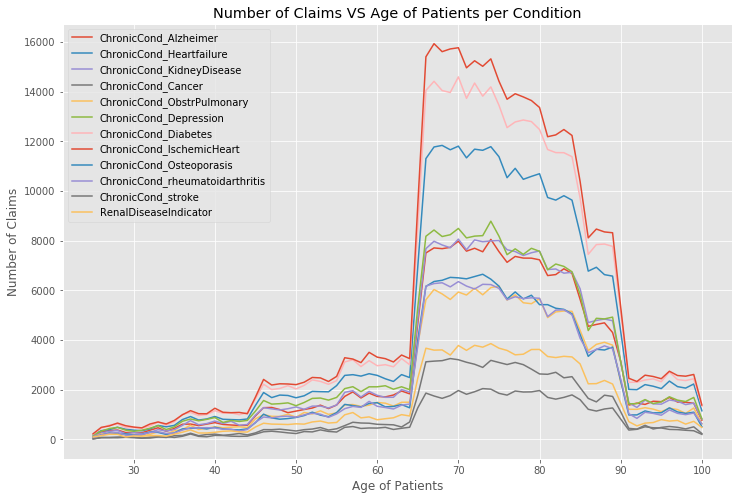

In [114]:
ax2 = full_data.groupby('AgeWhenServed').agg({'ChronicCond_Alzheimer' : 'sum',
                                        'ChronicCond_Heartfailure' : 'sum',
                                        'ChronicCond_KidneyDisease' : 'sum',
                                        'ChronicCond_Cancer' : 'sum',
                                        'ChronicCond_ObstrPulmonary' : 'sum',
                                        'ChronicCond_Depression' : 'sum',
                                        'ChronicCond_Diabetes' : 'sum',
                                        'ChronicCond_IschemicHeart' : 'sum',
                                        'ChronicCond_Osteoporasis' : 'sum',
                                        'ChronicCond_rheumatoidarthritis' : 'sum',
                                        'ChronicCond_stroke' : 'sum',
                                        'RenalDiseaseIndicator' : 'sum'}).plot(figsize = (12, 8), title = 'Number of Claims VS Age of Patients per Condition')
ax2.set_xlabel("Age of Patients")
ax2.set_ylabel('Number of Claims')

### In order to make sure the insurance premiums can cover the claims, the insurance company would need to categorize the patients according to their resource usage. In answering the question that what types of patients would make more outpatient visits, please provide your finding.

In [115]:
outpatient = full_data.loc[full_data.patientType == 'outpatient']


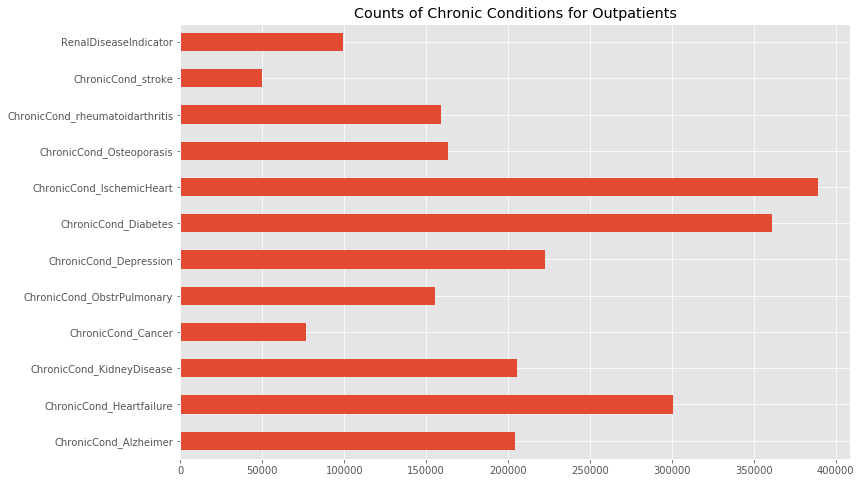

In [116]:
# Counting the cases of chronic conditions for outpatients
ax3 = outpatient.agg({'ChronicCond_Alzheimer' : 'sum',
                      'ChronicCond_Heartfailure' : 'sum',
                      'ChronicCond_KidneyDisease' : 'sum',
                      'ChronicCond_Cancer' : 'sum',
                      'ChronicCond_ObstrPulmonary' : 'sum',
                      'ChronicCond_Depression' : 'sum',
                      'ChronicCond_Diabetes' : 'sum',
                      'ChronicCond_IschemicHeart' : 'sum',
                      'ChronicCond_Osteoporasis' : 'sum',
                      'ChronicCond_rheumatoidarthritis' : 'sum',
                      'ChronicCond_stroke' : 'sum',
                      'RenalDiseaseIndicator' : 'sum'}).plot(figsize = (12, 8), kind='barh', title = 'Counts of Chronic Conditions for Outpatients')


### In answering what types of patients would make more inpatient service claims, please provide your findings.

In [117]:
inpatient = full_data.loc[full_data.patientType == 'inpatient']

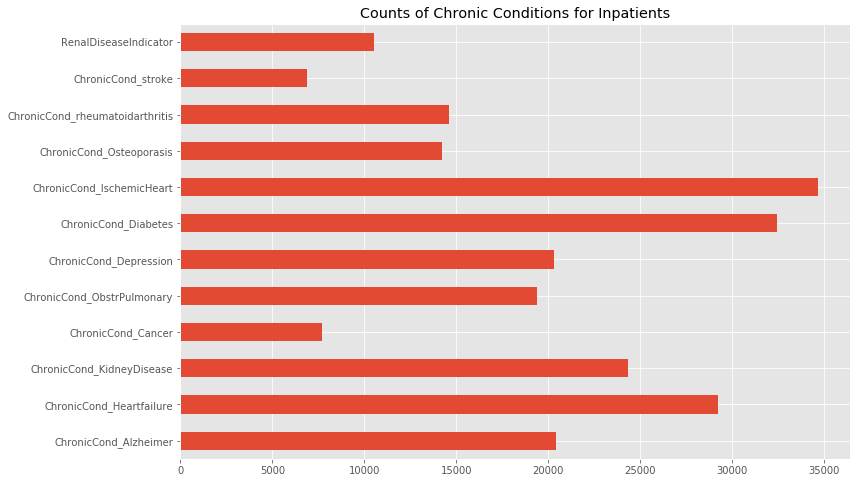

In [118]:
# Counting the cases of chronic conditions for inpatients
inpatient.agg({'ChronicCond_Alzheimer' : 'sum',
                'ChronicCond_Heartfailure' : 'sum',
                'ChronicCond_KidneyDisease' : 'sum',
                'ChronicCond_Cancer' : 'sum',
                'ChronicCond_ObstrPulmonary' : 'sum',
                'ChronicCond_Depression' : 'sum',
                'ChronicCond_Diabetes' : 'sum',
                'ChronicCond_IschemicHeart' : 'sum',
                'ChronicCond_Osteoporasis' : 'sum',
                'ChronicCond_rheumatoidarthritis' : 'sum',
                'ChronicCond_stroke' : 'sum',
                'RenalDiseaseIndicator' : 'sum'}).plot(figsize = (12, 8), kind='barh', title = 'Counts of Chronic Conditions for Inpatients')


### From the prospect of the insurance company, the reimbursed amounts are their coverage on the claims. Please analyze the patterns of the total reimbursed amounts (or average reimbursed amounts/visit) vs different types of patients.

In [119]:
# Calculating total annual reimbursement amount by adding annual reimbursement amount of inpatients and outpatient
full_data['TotalAnnualReimbursementAmt'] = full_data['IPAnnualReimbursementAmt'] + full_data['OPAnnualReimbursementAmt']


In [120]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import Figure, Bar, Histogram, Layout

# Graphing average amount of total annual reimbursement amount for every chronic conditions
group_1 = full_data[['ChronicCond_Alzheimer', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_Alzheimer')
group_2 = full_data[['ChronicCond_Heartfailure', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_Heartfailure')
group_3 = full_data[['ChronicCond_KidneyDisease', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_KidneyDisease')
group_4 = full_data[['ChronicCond_Cancer', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_Cancer')
group_5 = full_data[['ChronicCond_ObstrPulmonary', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_ObstrPulmonary')
group_6 = full_data[['ChronicCond_Depression', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_Depression')
group_7 = full_data[['ChronicCond_Diabetes', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_Diabetes')
group_8 = full_data[['ChronicCond_IschemicHeart', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_IschemicHeart')
group_9 = full_data[['ChronicCond_Osteoporasis', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_Osteoporasis')
group_10 = full_data[['ChronicCond_rheumatoidarthritis', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_rheumatoidarthritis')
group_11 = full_data[['ChronicCond_stroke', 'TotalAnnualReimbursementAmt']].groupby('ChronicCond_stroke')
group_12 = full_data[['RenalDiseaseIndicator', 'TotalAnnualReimbursementAmt']].groupby('RenalDiseaseIndicator')

cc_1 = group_1.get_group(1).ChronicCond_Alzheimer
cc_2 = group_2.get_group(1).ChronicCond_Heartfailure
cc_3 = group_3.get_group(1).ChronicCond_KidneyDisease
cc_4 = group_4.get_group(1).ChronicCond_Cancer
cc_5 = group_5.get_group(1).ChronicCond_ObstrPulmonary
cc_6 = group_6.get_group(1).ChronicCond_Depression
cc_7 = group_7.get_group(1).ChronicCond_Diabetes
cc_8 = group_8.get_group(1).ChronicCond_IschemicHeart
cc_9 = group_9.get_group(1).ChronicCond_Osteoporasis
cc_10 = group_10.get_group(1).ChronicCond_rheumatoidarthritis
cc_11 = group_11.get_group(1).ChronicCond_stroke
cc_12 = group_12.get_group(1).RenalDiseaseIndicator

amt_1 = group_1.get_group(1).TotalAnnualReimbursementAmt
amt_2 = group_2.get_group(1).TotalAnnualReimbursementAmt
amt_3 = group_3.get_group(1).TotalAnnualReimbursementAmt
amt_4 = group_4.get_group(1).TotalAnnualReimbursementAmt
amt_5 = group_5.get_group(1).TotalAnnualReimbursementAmt
amt_6 = group_6.get_group(1).TotalAnnualReimbursementAmt
amt_7 = group_7.get_group(1).TotalAnnualReimbursementAmt
amt_8 = group_8.get_group(1).TotalAnnualReimbursementAmt
amt_9 = group_9.get_group(1).TotalAnnualReimbursementAmt
amt_10 = group_10.get_group(1).TotalAnnualReimbursementAmt
amt_11 = group_11.get_group(1).TotalAnnualReimbursementAmt
amt_12 = group_12.get_group(1).TotalAnnualReimbursementAmt

getbins = lambda t:{'start':t.min(),'end':t.max(), 'size':1}

trace1 = Histogram(x=cc_1,
                   y=amt_1, 
                   histfunc='avg',
                   name='Alzheimer')

trace2 = Histogram(x=cc_2,
                   y=amt_2, 
                   histfunc='avg',
                   name='Heart Failure')

trace3 = Histogram(x=cc_3,
                   y=amt_3, 
                   histfunc='avg',
                   name='Kidney Disease')

trace4 = Histogram(x=cc_4,
                   y=amt_4, 
                   histfunc='avg',
                   name='Cancer')

trace5 = Histogram(x=cc_5,
                   y=amt_5, 
                   histfunc='avg',
                   name='ObstrPulmonary')

trace6 = Histogram(x=cc_6,
                   y=amt_6, 
                   histfunc='avg',
                   name='Depression')

trace7 = Histogram(x=cc_7,
                   y=amt_7, 
                   histfunc='avg',
                   name='Diabetes')

trace8 = Histogram(x=cc_8,
                   y=amt_8, 
                   histfunc='avg',
                   name='IschemicHeart')

trace9 = Histogram(x=cc_9,
                   y=amt_9, 
                   histfunc='avg',
                   name='Osteoporasis')

trace10 = Histogram(x=cc_10,
                   y=amt_10, 
                   histfunc='avg',
                   name='Rheumatoidarthritis')

trace11 = Histogram(x=cc_11,
                   y=amt_11, 
                   histfunc='avg',
                   name='Stroke')

trace12 = Histogram(x=cc_12,
                   y=amt_12, 
                   histfunc='avg',
                   name='RenalDisease')

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

layout = Layout(title="Average of Annual Reimbursement Amount on Types of Patients",
                xaxis=dict(title="Types of Patients", autorange=True, showgrid=False, ticks='', showticklabels=False),
                yaxis=dict(title="Average of Annual Reimbursement Amount"),
                bargroupgap=0.1)
fig = Figure(data=data, layout=layout)

# plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400, image = 'svg')

### From the prospect of the providers, the sum of reimbursed amounts and deductibles are flowing to the providers. Based on this, analyze which types of patients contribute more to the providers in terms of the aggregate charges or the average charge per visit.

In [121]:
# Calculating total charges by adding total annual reimbursement amount and annual deductible amount for both inpatients and outpatients
full_data['TotalCharges'] = full_data['TotalAnnualReimbursementAmt'] + full_data['IPAnnualDeductibleAmt'] + full_data['OPAnnualDeductibleAmt']


In [122]:
# Graphing average amount of total charges for every chronic conditions

group_1 = full_data[['ChronicCond_Alzheimer', 'TotalCharges']].groupby('ChronicCond_Alzheimer')
group_2 = full_data[['ChronicCond_Heartfailure', 'TotalCharges']].groupby('ChronicCond_Heartfailure')
group_3 = full_data[['ChronicCond_KidneyDisease', 'TotalCharges']].groupby('ChronicCond_KidneyDisease')
group_4 = full_data[['ChronicCond_Cancer', 'TotalCharges']].groupby('ChronicCond_Cancer')
group_5 = full_data[['ChronicCond_ObstrPulmonary', 'TotalCharges']].groupby('ChronicCond_ObstrPulmonary')
group_6 = full_data[['ChronicCond_Depression', 'TotalCharges']].groupby('ChronicCond_Depression')
group_7 = full_data[['ChronicCond_Diabetes', 'TotalCharges']].groupby('ChronicCond_Diabetes')
group_8 = full_data[['ChronicCond_IschemicHeart', 'TotalCharges']].groupby('ChronicCond_IschemicHeart')
group_9 = full_data[['ChronicCond_Osteoporasis', 'TotalCharges']].groupby('ChronicCond_Osteoporasis')
group_10 = full_data[['ChronicCond_rheumatoidarthritis', 'TotalCharges']].groupby('ChronicCond_rheumatoidarthritis')
group_11 = full_data[['ChronicCond_stroke', 'TotalCharges']].groupby('ChronicCond_stroke')
group_12 = full_data[['RenalDiseaseIndicator', 'TotalCharges']].groupby('RenalDiseaseIndicator')

cc_1 = group_1.get_group(1).ChronicCond_Alzheimer
cc_2 = group_2.get_group(1).ChronicCond_Heartfailure
cc_3 = group_3.get_group(1).ChronicCond_KidneyDisease
cc_4 = group_4.get_group(1).ChronicCond_Cancer
cc_5 = group_5.get_group(1).ChronicCond_ObstrPulmonary
cc_6 = group_6.get_group(1).ChronicCond_Depression
cc_7 = group_7.get_group(1).ChronicCond_Diabetes
cc_8 = group_8.get_group(1).ChronicCond_IschemicHeart
cc_9 = group_9.get_group(1).ChronicCond_Osteoporasis
cc_10 = group_10.get_group(1).ChronicCond_rheumatoidarthritis
cc_11 = group_11.get_group(1).ChronicCond_stroke
cc_12 = group_12.get_group(1).RenalDiseaseIndicator

amt_1 = group_1.get_group(1).TotalCharges
amt_2 = group_2.get_group(1).TotalCharges
amt_3 = group_3.get_group(1).TotalCharges
amt_4 = group_4.get_group(1).TotalCharges
amt_5 = group_5.get_group(1).TotalCharges
amt_6 = group_6.get_group(1).TotalCharges
amt_7 = group_7.get_group(1).TotalCharges
amt_8 = group_8.get_group(1).TotalCharges
amt_9 = group_9.get_group(1).TotalCharges
amt_10 = group_10.get_group(1).TotalCharges
amt_11 = group_11.get_group(1).TotalCharges
amt_12 = group_12.get_group(1).TotalCharges

getbins = lambda t:{'start':t.min(),'end':t.max(), 'size':1}

trace1 = Histogram(x=cc_1,
                   y=amt_1, 
                   histfunc='avg',
                   name='Alzheimer')

trace2 = Histogram(x=cc_2,
                   y=amt_2, 
                   histfunc='avg',
                   name='Heart Failure')

trace3 = Histogram(x=cc_3,
                   y=amt_3, 
                   histfunc='avg',
                   name='Kidney Disease')

trace4 = Histogram(x=cc_4,
                   y=amt_4, 
                   histfunc='avg',
                   name='Cancer')

trace5 = Histogram(x=cc_5,
                   y=amt_5, 
                   histfunc='avg',
                   name='ObstrPulmonary')

trace6 = Histogram(x=cc_6,
                   y=amt_6, 
                   histfunc='avg',
                   name='Depression')

trace7 = Histogram(x=cc_7,
                   y=amt_7, 
                   histfunc='avg',
                   name='Diabetes')

trace8 = Histogram(x=cc_8,
                   y=amt_8, 
                   histfunc='avg',
                   name='IschemicHeart')

trace9 = Histogram(x=cc_9,
                   y=amt_9, 
                   histfunc='avg',
                   name='Osteoporasis')

trace10 = Histogram(x=cc_10,
                   y=amt_10, 
                   histfunc='avg',
                   name='Rheumatoidarthritis')

trace11 = Histogram(x=cc_11,
                   y=amt_11, 
                   histfunc='avg',
                   name='Stroke')

trace12 = Histogram(x=cc_12,
                   y=amt_12, 
                   histfunc='avg',
                   name='RenalDisease')

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

layout = Layout(title="Average of Total Charges on Types of Patients",
                xaxis=dict(title="Types of Patients", autorange=True, showgrid=False, ticks='', showticklabels=False),
                yaxis=dict(title="Average of Total Charges"),
                bargroupgap=0.1)
fig = Figure(data=data, layout=layout)

# plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

## Warmup Question 3

### Based on the attribute ClaimStartDt, analyze the weekly service volume variations.

In [164]:
full_data['ClaimStartDt'] = pd.to_datetime(full_data['ClaimStartDt'])
full_data['ClaimStartWeek']= full_data['ClaimStartDt'].dt.week


In [167]:
weeklyClaims= full_data.groupby(['Provider','ClaimStartWeek', 'ClaimID'])['ClaimID'].count().reset_index(name='WeeklyClaims').\
groupby(['Provider', 'ClaimStartWeek'])['WeeklyClaims'].count().reset_index()

weeklyClaims

,Provider,ClaimStartWeek,WeeklyClaims
0,PRV51001,1,1
1,PRV51001,5,1
2,PRV51001,6,4
3,PRV51001,12,1
4,PRV51001,13,2
...,...,...,...
139414,PRV57763,48,3
139415,PRV57763,49,1
139416,PRV57763,50,1
139417,PRV57763,51,2


- The number of claims start to peak at week 5 and starts to go down at week 30. There is a significant drop at week 50.

Text(0, 0.5, 'total claims')

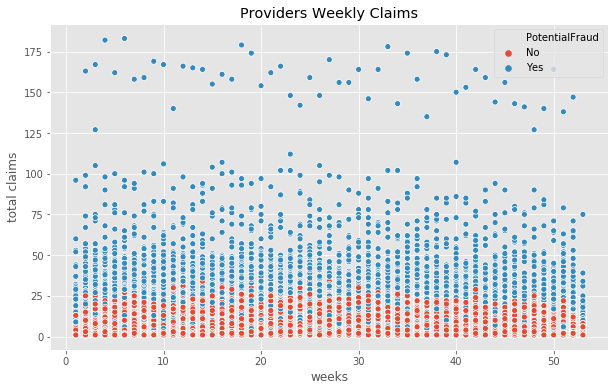

In [169]:
weeklyClaim = full_data.groupby(['ClaimStartWeek', 'Provider'])['ClaimID'].count().reset_index(name='NumClaims')

weeklyClaim2 = pd.merge(weeklyClaim, train_potentialfraud, on='Provider', how='left')
f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='ClaimStartWeek', y='NumClaims', data=weeklyClaim2, hue='PotentialFraud')
plt.title('Providers Weekly Claims')
plt.xlabel('weeks')
plt.ylabel('total claims')


- Duration of the treatments

Text(0, 0.5, 'Average Duration of the Claims in Days')

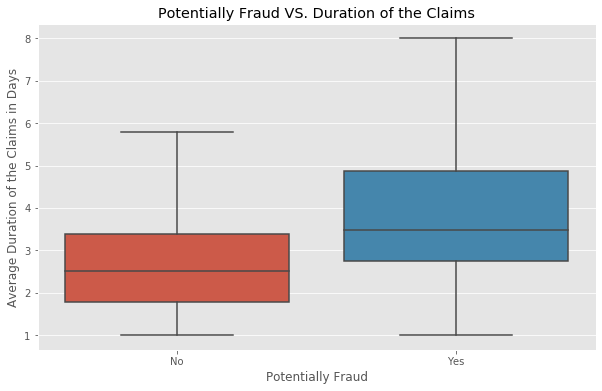

In [182]:
full_data['ClaimEndDt'] = pd.to_datetime(full_data['ClaimEndDt'])
full_data['Duration'] = full_data['ClaimEndDt'].sub(full_data['ClaimStartDt'], axis=0)/np.timedelta64(1,'D') + 1

duration = full_data.groupby(['Provider'])['Duration'].mean().reset_index(name='AvgDurationTrtment')
duration2 = pd.merge(duration, train_potentialfraud, on='Provider', how='left')

f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='PotentialFraud', y='AvgDurationTrtment', data=duration2, showfliers=False)
plt.title('Potentially Fraud VS. Duration of the Claims')
plt.xlabel('Potentially Fraud')
plt.ylabel('Average Duration of the Claims in Days')


### Identify the top 5 most frequent ClmAdmitDiagnosisCodes and trace their weekly seasonalities. Display the patterns you find.

In [174]:
full_data.ClmAdmitDiagnosisCode.value_counts()[:10].reset_index().rename(columns={})

,index,ClmAdmitDiagnosisCode
0,V7612,4074
1,42731,3634
2,78605,2992
3,4019,2732
4,25000,2368
5,78900,2336
6,78650,2273
7,V5883,1873
8,7295,1844
9,78079,1779


Text(0, 0.5, 'Count of Claims')

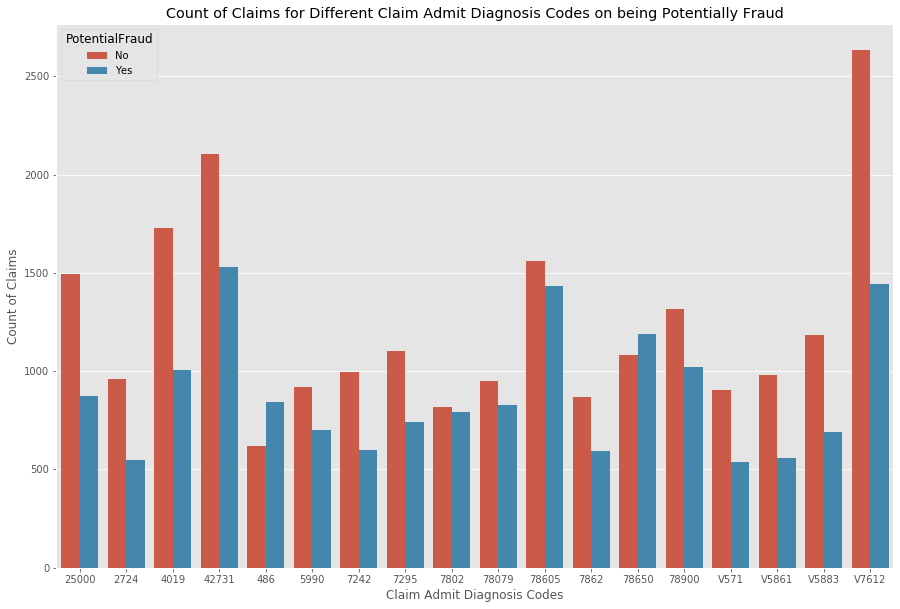

In [184]:
code = full_data.groupby(['ClmAdmitDiagnosisCode'])['ClmAdmitDiagnosisCode'].count().reset_index(name='count')

code1 = code.loc[code['count'] > 1200]

code2 = pd.merge(code1, full_data[['PotentialFraud','ClmAdmitDiagnosisCode']], on='ClmAdmitDiagnosisCode', how='left')
a= code2.groupby(['PotentialFraud', 'ClmAdmitDiagnosisCode'])['ClmAdmitDiagnosisCode'].count().reset_index(name='count')

f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='ClmAdmitDiagnosisCode', y='count', data=a, hue='PotentialFraud')
plt.title('Count of Claims for Different Claim Admit Diagnosis Codes on being Potentially Fraud')
plt.xlabel('Claim Admit Diagnosis Codes')
plt.ylabel('Count of Claims')

- The codes with most fraudelent accounts are 42731, 78605 and v7612. 
- There is one code that has more yes than no (78650).
- Code V7612 has the highest number of claims from week 1 up to week 15 and also had the highest drops of claims.
- Most of the codes shows a decline of claims as the week progresses.
- Patient with diagnosis code V5789 had the highest median duration which is around 15 days.

### For the monthly inpatient/outpatient claim counts of all the providers, please analyze the table of provider-month matrices and report any interesting findings. 
### Hint: dataframe's pivot_table method could be used to construct the provider-month matrix.

In [171]:
full_data['startClaimMonth'] = full_data['ClaimStartDt'].dt.month

monthly = full_data.groupby(['Provider','startClaimMonth', 'ClaimID'])['ClaimID'].count().reset_index(name='MonthlyClaims').\
groupby(['Provider', 'startClaimMonth'])['MonthlyClaims'].count().reset_index()

pd.pivot_table(data=monthly, values='MonthlyClaims', index='Provider', columns=[ 'startClaimMonth']).fillna(0)

startClaimMonth,1,2,3,4,5,6,7,8,9,10,11,12
Provider,,,,,,,,,,,,
PRV51001,2.0,4.0,3.0,2.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0
PRV51003,13.0,16.0,10.0,10.0,8.0,14.0,11.0,13.0,9.0,11.0,11.0,6.0
PRV51004,12.0,19.0,18.0,10.0,8.0,11.0,14.0,10.0,12.0,11.0,8.0,16.0
PRV51005,102.0,101.0,113.0,98.0,83.0,103.0,92.0,99.0,107.0,111.0,73.0,83.0
PRV51007,6.0,5.0,9.0,4.0,9.0,9.0,3.0,6.0,7.0,2.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57759,6.0,1.0,2.0,2.0,4.0,3.0,3.0,1.0,2.0,1.0,2.0,1.0
PRV57760,1.0,5.0,1.0,1.0,1.0,3.0,0.0,4.0,3.0,0.0,2.0,1.0
PRV57761,5.0,6.0,4.0,5.0,8.0,10.0,5.0,5.0,4.0,14.0,11.0,5.0


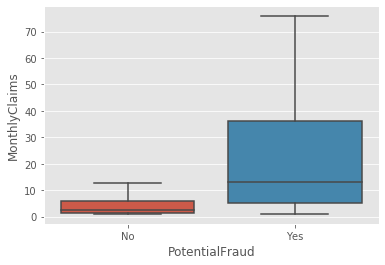

In [172]:
prov = monthly.groupby('Provider')['MonthlyClaims'].mean().reset_index()
prov2= pd.merge(prov, train_potentialfraud, on='Provider', how='left')

sns.boxplot(x='PotentialFraud', y='MonthlyClaims', data=prov2, showfliers=False)

Text(0.5, 1.0, 'Providers Monthly Claims')

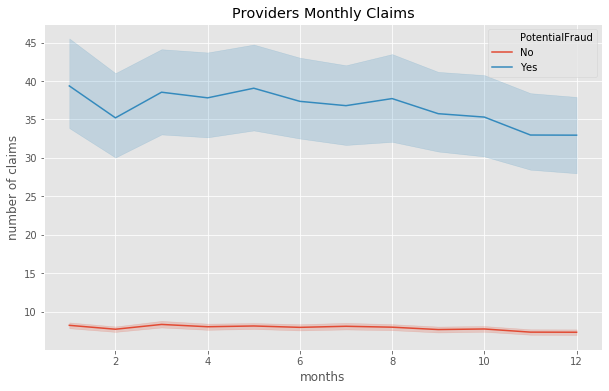

In [173]:
monthly2 = pd.merge(monthly, train_potentialfraud, on='Provider', how='left')

f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='startClaimMonth', y='MonthlyClaims', data=monthly2, hue='PotentialFraud')
plt.xlabel('months')
plt.ylabel('number of claims')
plt.title('Providers Monthly Claims')

## Warmup Question 4

### Study the distributions of InscClaimAmtReimbursed, DeductibleAmtPaid for both inpatient and outpatient services. Your team might want to work with hist, scatter or sns.pairplot, distplot, etc.

In [14]:
inpat1 = train_inpatientdata.copy()
outpat1 = train_outpatientdata.copy()

In [15]:
outpat_deduct = outpat1['DeductibleAmtPaid'].value_counts().reset_index()
inpat_deduct = inpat1['DeductibleAmtPaid'].value_counts().reset_index()

In [16]:
outpat_deduct.rename(columns={'index':'DeductAmtPaid',\
                              'DeductibleAmtPaid':'Frequency'}, \
                     inplace=True)

inpat_deduct.rename(columns={'index':'DeductAmtPaid',\
                              'DeductibleAmtPaid':'Frequency'}, \
                    inplace=True)

Text(0.5, 1.0, 'Outpatient Deductible Amount Paid Distribution')

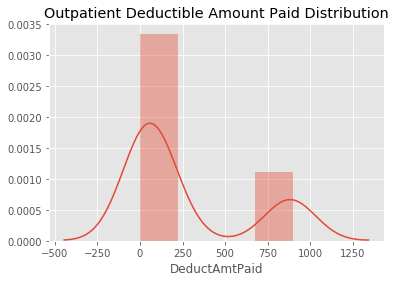

In [17]:
sns.distplot(outpat_deduct['DeductAmtPaid']).set_title('Outpatient Deductible Amount Paid Distribution')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Inpatient Deductible Amount Paid Distribution')

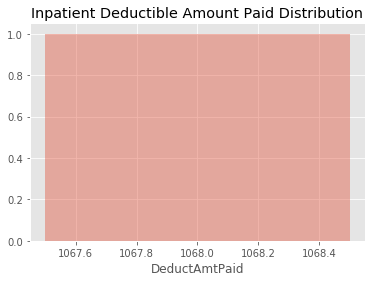

In [18]:
sns.distplot(inpat_deduct['DeductAmtPaid']).set_title('Inpatient Deductible Amount Paid Distribution')

In [19]:
outpat_deduct["FrequencyLog"] = np.log(outpat_deduct['Frequency'])
inpat_deduct["FrequencyLog"] = np.log(inpat_deduct['Frequency'])

In [20]:
outpat_deduct_freq = outpat_deduct[['DeductAmtPaid','FrequencyLog']]
inpat_deduct_freq = inpat_deduct[['DeductAmtPaid','FrequencyLog']]

In [21]:
inpat_outpat_deduct = pd.concat([outpat_deduct_freq.assign \
                             (Legend='Outpatient'), \
                             inpat_deduct_freq. \
                             assign(Legend='Inpatient')])

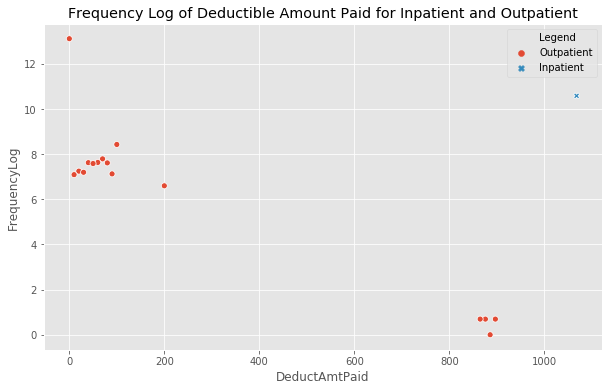

In [196]:
f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='DeductAmtPaid', y='FrequencyLog', \
                data=inpat_outpat_deduct,
                hue='Legend', style='Legend').set_title \
('Frequency Log of Deductible Amount Paid for Inpatient and Outpatient')
plt.show()

In [23]:
outpat_reimb = outpat1['InscClaimAmtReimbursed'].value_counts().reset_index()
inpat_reimb = inpat1['InscClaimAmtReimbursed'].value_counts().reset_index()

In [24]:
outpat_reimb.rename(columns={'index':'AmtReimbursed',\
                              'InscClaimAmtReimbursed':'Frequency'}, \
                     inplace=True)

inpat_reimb.rename(columns={'index':'AmtReimbursed',\
                              'InscClaimAmtReimbursed':'Frequency'}, \
                    inplace=True)

Text(0.5, 1.0, 'Outpatient: Distribution of Insurance Claim Amount Reimbursed')

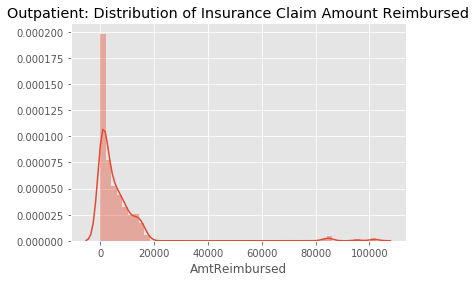

In [25]:
sns.distplot(outpat_reimb['AmtReimbursed']).set_title('Outpatient: Distribution of Insurance Claim Amount Reimbursed')

Text(0.5, 1.0, 'Inpatient: Distribution of Insurance Claim Amount Reimbursed')

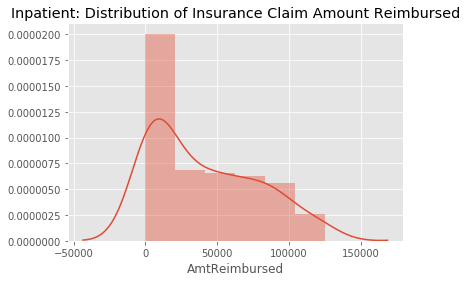

In [26]:
sns.distplot(inpat_reimb['AmtReimbursed']).set_title('Inpatient: Distribution of Insurance Claim Amount Reimbursed')

In [27]:
outpat_reimb["FrequencyLog"] = np.log(outpat_reimb['Frequency'])
inpat_reimb["FrequencyLog"] = np.log(inpat_reimb['Frequency'])

In [28]:
outpat_reimb_freq = outpat_reimb[['AmtReimbursed','FrequencyLog']]
inpat_reimb_freq = inpat_reimb[['AmtReimbursed','FrequencyLog']]

In [29]:
inpat_outpat_reimb = pd.concat([outpat_reimb_freq.assign \
                             (Legend='Outpatient'), \
                             inpat_reimb_freq. \
                             assign(Legend='Inpatient')])

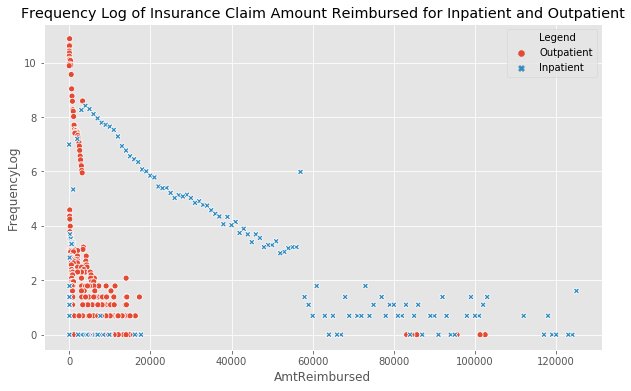

In [197]:
f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='AmtReimbursed', y='FrequencyLog', \
                data=inpat_outpat_reimb,
                hue='Legend', style='Legend').set_title \
('Frequency Log of Insurance Claim Amount Reimbursed for \
Inpatient and Outpatient')
plt.show()

In [31]:
print(outpat1['DeductibleAmtPaid'].mean())
print(inpat1['DeductibleAmtPaid'].mean())
print(outpat1['InscClaimAmtReimbursed'].mean())
print(inpat1['InscClaimAmtReimbursed'].mean())

2.7792334718206346
1068.0
286.33479932861667
10087.884073726344


In [32]:
data = [['Outpatient Deductible Paid',2.78], \
        ['Inpatient Deductible Paid',1068], \
        ['Outpatient Reimbursed Amount',286], \
        ['Inpatient Reimbursed Amount',10088]]
inout_deductreimb_mean = pd.DataFrame(data, columns = ['Type of Patient \
and Payment', 'Deductible Paid/Insurance Reimbursed Mean'])

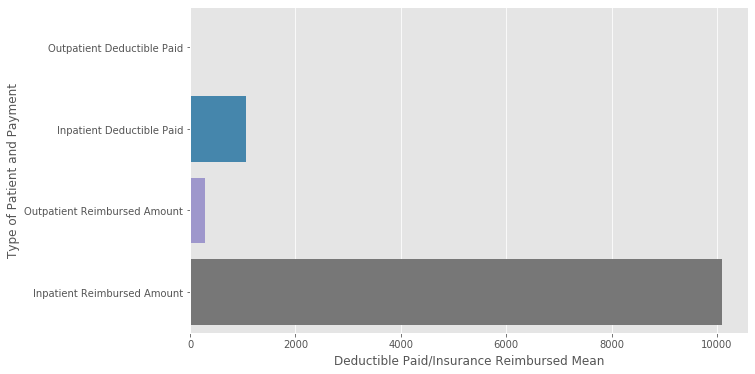

In [198]:
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=inout_deductreimb_mean['Deductible Paid/Insurance Reimbursed Mean'], \
            y=inout_deductreimb_mean['Type of Patient and Payment'], \
            data=inout_deductreimb_mean)

### Study the distributions of insurance covered percentages InscClaimAmtReimbursed / (InscClaimAmtReimbursed + DeductibleAmtPaid).

In [34]:
outpat1['insur_covered_percent'] = outpat1['InscClaimAmtReimbursed']/ \
(outpat1['InscClaimAmtReimbursed'] + outpat1['DeductibleAmtPaid'])

In [35]:
inpat1['insur_covered_percent'] = inpat1['InscClaimAmtReimbursed']/ \
(inpat1['InscClaimAmtReimbursed'] + inpat1['DeductibleAmtPaid'])

In [37]:
print(outpat1['insur_covered_percent'].mean())
print(inpat1['insur_covered_percent'].mean())

0.9820111642082944
0.8297984273395596


In [38]:
data2 = [['Outpatient',0.98],['Inpatient',0.83]]
insur_covered_percent = pd.DataFrame(data2, columns = \
                                     ['Type of Patient',\
                                      'Insurance Covered Percentages Mean'])

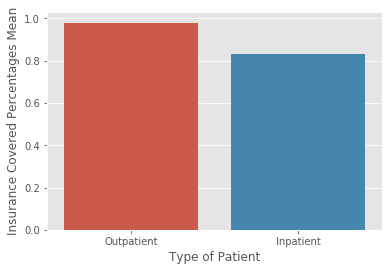

In [39]:
sns.barplot(x=insur_covered_percent['Type of Patient'],\
            y=insur_covered_percent['Insurance Covered Percentages Mean'],\
            data=insur_covered_percent)

In [40]:
outpat_covered = outpat1['insur_covered_percent'].value_counts().reset_index()
inpat_covered = inpat1['insur_covered_percent'].value_counts().reset_index()

In [41]:
outpat_covered.rename(columns={'index':'Insurace Covered Percentage',\
                              'insur_covered_percent':'Frequency'}, \
                     inplace=True)

inpat_covered.rename(columns={'index':'Insurace Covered Percentage',\
                              'insur_covered_percent':'Frequency'}, \
                    inplace=True)

Text(0.5, 1.0, 'Outpatient Insurance Covered Percentage Distribution')

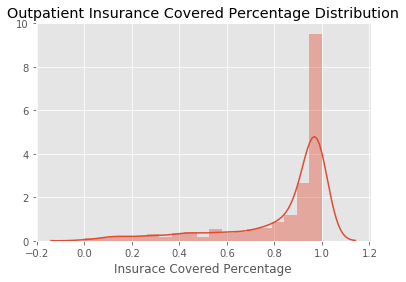

In [42]:
sns.distplot(outpat_covered['Insurace Covered Percentage']).set_title \
('Outpatient Insurance Covered Percentage Distribution')

Text(0.5, 1.0, 'Inpatient Insurance Covered Percentage Distribution')

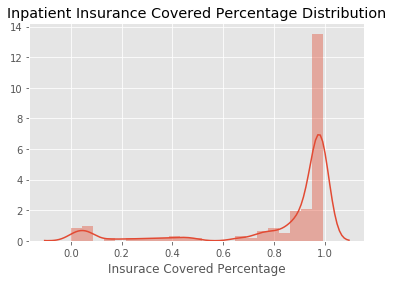

In [43]:
sns.distplot(inpat_covered['Insurace Covered Percentage']).set_title \
('Inpatient Insurance Covered Percentage Distribution')

In [44]:
outpat_covered["FrequencyLog"] = np.log(outpat_covered['Frequency'])
inpat_covered["FrequencyLog"] = np.log(inpat_covered['Frequency'])
outpat_covered_freq = outpat_covered[['Insurace Covered Percentage','FrequencyLog']]
inpat_covered_freq = inpat_covered[['Insurace Covered Percentage','FrequencyLog']]

In [45]:
inpat_outpat_covered = pd.concat([outpat_covered_freq.assign \
                             (Legend='Outpatient'), \
                             inpat_covered_freq. \
                             assign(Legend='Inpatient')])

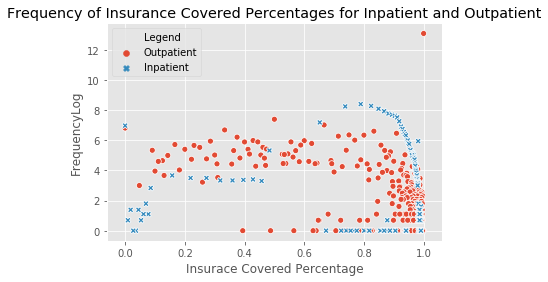

In [46]:
sns.scatterplot(x='Insurace Covered Percentage', y='FrequencyLog', \
                data=inpat_outpat_covered,
                hue='Legend', style='Legend').set_title \
('Frequency of Insurance Covered Percentages for \
Inpatient and Outpatient')
plt.show()

### Study the distributions of the durations of average insurance claims (end-start) of the providers? Box-plot/violin-plot based on the PotentialFraud flag. Do you find any differences for none-potential fraud vs potential-fraud providers?

In [47]:
outpat1['ClaimStartDt'] = pd.to_datetime(outpat1['ClaimStartDt'])
outpat1['ClaimEndDt'] = pd.to_datetime(outpat1['ClaimEndDt'])
outpat1['ServiceDays'] = outpat1['ClaimEndDt'] - outpat1['ClaimStartDt']

In [48]:
inpat1['ClaimStartDt'] = pd.to_datetime(inpat1['ClaimStartDt'])
inpat1['ClaimEndDt'] = pd.to_datetime(inpat1['ClaimEndDt'])
inpat1['ServiceDays'] = inpat1['ClaimEndDt'] - inpat1['ClaimStartDt']

In [49]:
outpat1['ServiceDays'] = outpat1['ServiceDays'].astype(str)
outpat1['ServiceDays'] = outpat1['ServiceDays'].str.replace('days', ' ')

In [50]:
outpat1['ServiceDays'] = outpat1['ServiceDays']. \
str.replace('00:00:00.000000000', '')
outpat1['ServiceDays'] = outpat1['ServiceDays'].astype(int)
outpat1['ServiceDays'] = outpat1['ServiceDays'] + 1

In [51]:
provider_service = outpat1.groupby('Provider')['ServiceDays'].mean().reset_index()

Text(0.5, 1.0, 'Outpatient: Distribution of Mean Service Days by Provider')

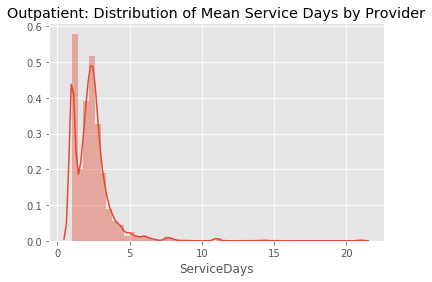

In [52]:
sns.distplot(provider_service['ServiceDays']).set_title \
('Outpatient: Distribution of Mean Service Days by Provider')

In [55]:
inpat1['ServiceDays'] = inpat1['ServiceDays'].astype(str)
inpat1['ServiceDays'] = inpat1['ServiceDays'].str.replace('days', ' ')

In [56]:
inpat1['ServiceDays'] = inpat1['ServiceDays']. \
str.replace('00:00:00.000000000', '')
inpat1['ServiceDays'] = inpat1['ServiceDays'].astype(int)
inpat1['ServiceDays'] = inpat1['ServiceDays'] + 1

Text(0.5, 1.0, 'Inpatient: Distribution of Mean Service Days by Provider')

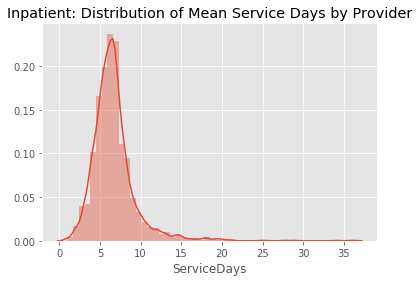

In [57]:
provider_service2 = inpat1.groupby('Provider')['ServiceDays'].mean().reset_index()

sns.distplot(provider_service2['ServiceDays']).set_title \
('Inpatient: Distribution of Mean Service Days by Provider')

In [58]:
outpat_provider_days = outpat1[['Provider','ServiceDays']]

In [60]:
outpat_days_fraud = pd.merge(train_potentialfraud, outpat_provider_days, on='Provider')

Text(0.5, 1.0, 'Outpatient:Durations of Average Insurance Claims by Non and Potential Fraudulent Providers')

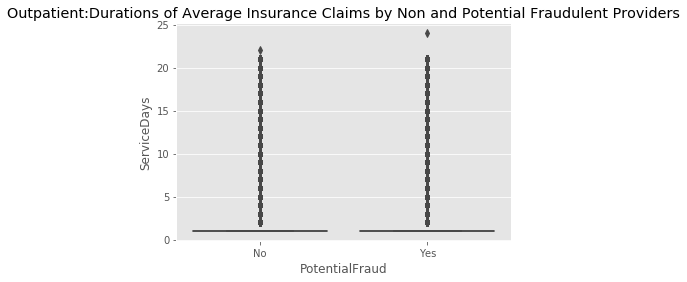

In [61]:
sns.boxplot(x='PotentialFraud', y='ServiceDays', \
            data=outpat_days_fraud).set_title\
('Outpatient:Durations of Average Insurance Claims \
by Non and Potential Fraudulent Providers')

In [62]:
days_log1 = np.log(outpat_days_fraud['ServiceDays'])

Text(0.5, 1.0, 'Outpatient:Log Durations of Average Insurance Claims by Non and Potential Fraudulent Providers')

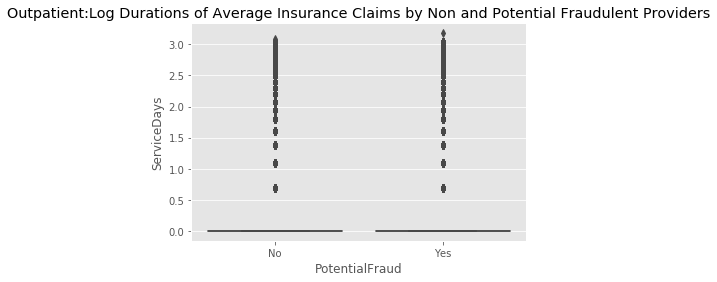

In [63]:
sns.boxplot(x='PotentialFraud', y=days_log1, data=outpat_days_fraud). \
set_title\
('Outpatient:Log Durations of Average Insurance Claims \
by Non and Potential Fraudulent Providers')

Text(0.5, 1.0, 'Outpatient:Durations of Average Insurance Claims by Non and Potential Fraudulent Providers')

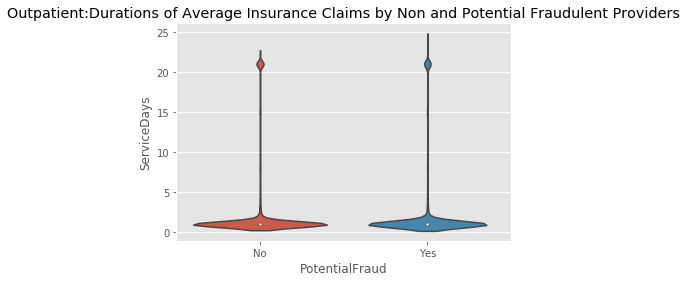

In [64]:
sns.violinplot(x='PotentialFraud', y='ServiceDays', \
               data=outpat_days_fraud).set_title\
('Outpatient:Durations of Average Insurance Claims \
by Non and Potential Fraudulent Providers')

In [66]:
inpat_provider_days = inpat1[['Provider','ServiceDays']]
inpat_days_fraud = pd.merge(train_potentialfraud, inpat_provider_days, on='Provider')

Text(0.5, 1.0, 'Inpatient:Durations of Average Insurance Claims by Non and Potential Fraudulent Providers')

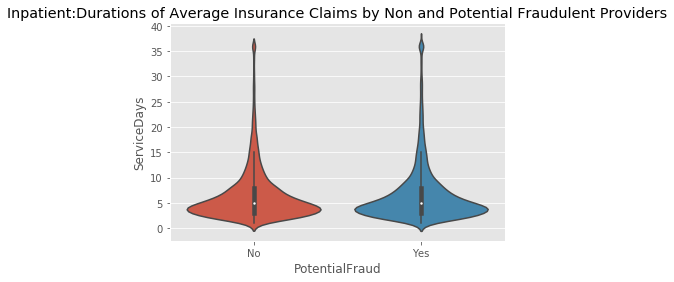

In [67]:
sns.violinplot(x='PotentialFraud', y='ServiceDays', \
               data=inpat_days_fraud).set_title\
('Inpatient:Durations of Average Insurance Claims \
by Non and Potential Fraudulent Providers')

Text(0.5, 1.0, 'Inpatient:Durations of Average Insurance Claims by Non and Potential Fraudulent Providers')

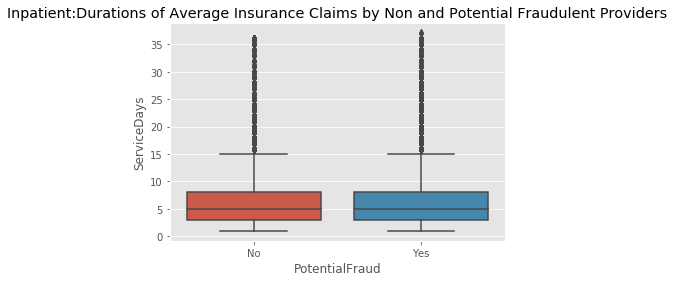

In [68]:
sns.boxplot(x='PotentialFraud', y='ServiceDays', \
            data=inpat_days_fraud).set_title\
('Inpatient:Durations of Average Insurance Claims \
by Non and Potential Fraudulent Providers')

In [69]:
print(outpat_days_fraud.groupby('PotentialFraud')['ServiceDays'].mean()\
      .sort_values(ascending=False))

PotentialFraud
Yes    2.433551
No     2.413022
Name: ServiceDays, dtype: float64


In [70]:
print(inpat_days_fraud.groupby('PotentialFraud')['ServiceDays'].mean()\
      .sort_values(ascending=False))

PotentialFraud
Yes    6.737886
No     6.553831
Name: ServiceDays, dtype: float64


In [71]:
data3 = [['Outpat Pot Fraud',2.43],['Outpat Non-Pot Fraud',2.41], \
         ['Inpat Pot Fraud',6.74],['Inpat Non-Pot Fraud',6.55]]

servicedays_inoutpat_fraud = pd.DataFrame(data3, columns = \
                                     ['Type of Provider',\
                                      'Mean Duration of Average Insurance Claims'])

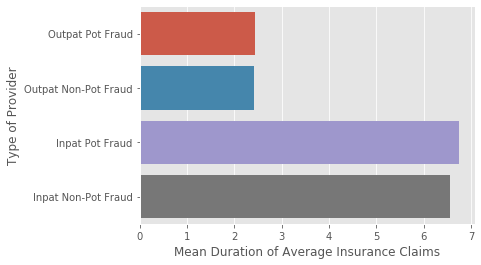

In [72]:
sns.barplot(x=servicedays_inoutpat_fraud['Mean Duration of Average Insurance Claims'],\
            y=servicedays_inoutpat_fraud['Type of Provider'],\
            data=servicedays_inoutpat_fraud)

### How are the service durations related to the total claim amounts, i.e. InscClaimAmtReimbursed + DeductibleAmtPaid?

In [73]:
outpat1['Total Claim Amounts'] = outpat1['InscClaimAmtReimbursed'] + \
outpat1['DeductibleAmtPaid']

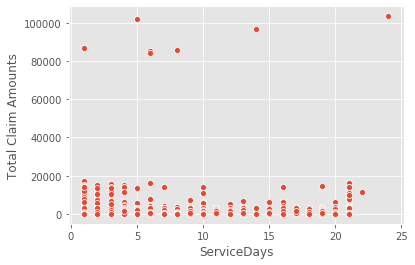

In [74]:
sns.scatterplot(x=outpat1['ServiceDays'], \
                y=outpat1['Total Claim Amounts'], data=outpat1)

In [75]:
y1 = np.log10(outpat1['Total Claim Amounts'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


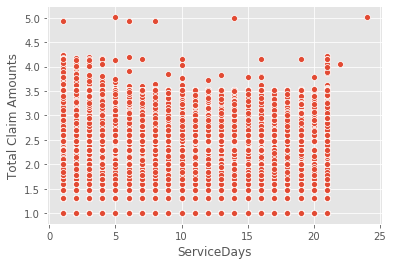

In [76]:
sns.scatterplot(x=outpat1['ServiceDays'], \
                y=y1, data=outpat1)

In [77]:
outpat_days_totalclaims=outpat1.groupby('ServiceDays')['Total Claim Amounts'].mean()\
      .sort_values(ascending=False).reset_index()

In [78]:
outpat_days_totalclaims['Claim_log'] = np.log10 \
(outpat_days_totalclaims['Total Claim Amounts'])

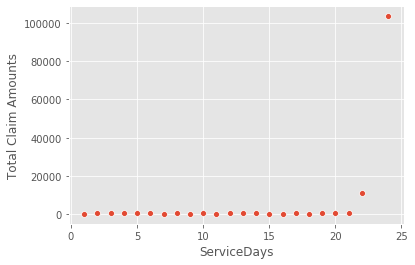

In [79]:
sns.scatterplot(x=outpat_days_totalclaims['ServiceDays'], \
                y=outpat_days_totalclaims['Total Claim Amounts'], \
                data=outpat_days_totalclaims)

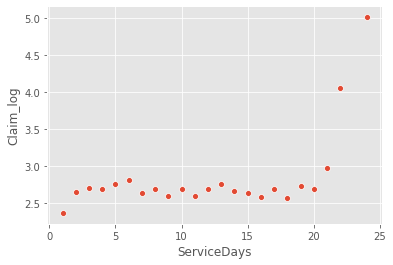

In [80]:
sns.scatterplot(x=outpat_days_totalclaims['ServiceDays'], \
                y=outpat_days_totalclaims['Claim_log'], \
                data=outpat_days_totalclaims)

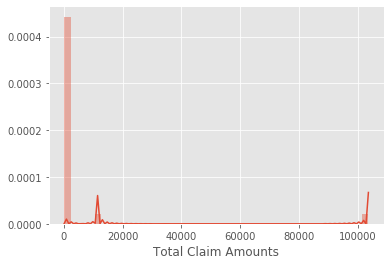

In [81]:
sns.distplot(outpat_days_totalclaims['Total Claim Amounts'])

In [82]:
inpat1['Total Claim Amounts'] = inpat1['InscClaimAmtReimbursed'] + \
inpat1['DeductibleAmtPaid']

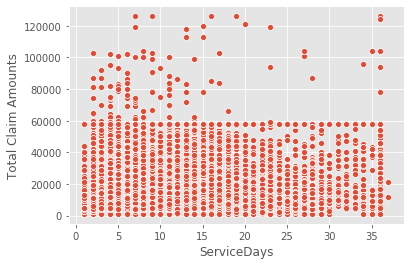

In [83]:
sns.scatterplot(x=inpat1['ServiceDays'], \
                y=inpat1['Total Claim Amounts'], data=inpat1)

In [84]:
inpat_days_totalclaims=inpat1.groupby('ServiceDays')['Total Claim Amounts'].mean()\
      .sort_values(ascending=False).reset_index()

In [85]:
inpat_days_totalclaims['Claim_log'] = np.log10 \
(inpat_days_totalclaims['Total Claim Amounts'])

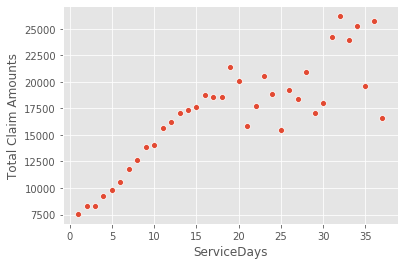

In [86]:
sns.scatterplot(x=inpat_days_totalclaims['ServiceDays'], \
                y=inpat_days_totalclaims['Total Claim Amounts'], \
                data=inpat_days_totalclaims)

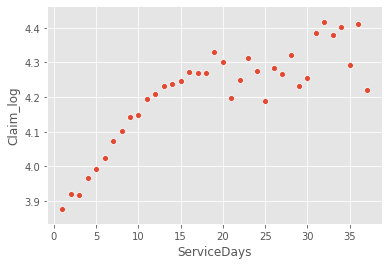

In [87]:
sns.scatterplot(x=inpat_days_totalclaims['ServiceDays'], \
                y=inpat_days_totalclaims['Claim_log'], \
                data=inpat_days_totalclaims)

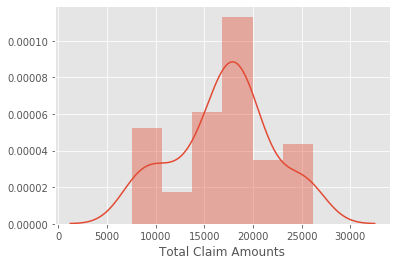

In [88]:
sns.distplot(inpat_days_totalclaims['Total Claim Amounts'])

### Consider mean daily total charges (i.e. total charge / duration), please describe their distribution. How do the Potential Fraud flag affect the distribution patterns?

In [89]:
outpat1['Mean Daily Total Charges'] = outpat1['Total Claim Amounts'] / \
outpat1['ServiceDays']

Text(0.5, 1.0, 'Outpatient: Mean Daily Total Charges Distribution')

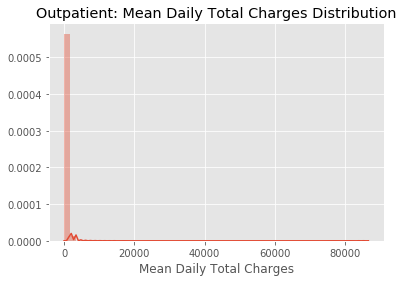

In [90]:
sns.distplot(outpat1['Mean Daily Total Charges']). \
set_title('Outpatient: Mean Daily Total Charges Distribution')

In [91]:
inpat1['Mean Daily Total Charges'] = inpat1['Total Claim Amounts'] / \
inpat1['ServiceDays']

In [92]:
inpat_daily_total = inpat1[['Mean Daily Total Charges']]
inpat_daily_total = inpat_daily_total.dropna()

Text(0.5, 1.0, 'Inpatient: Mean Daily Total Charges Distribution')

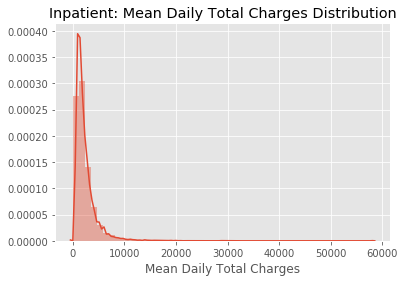

In [93]:
sns.distplot(inpat_daily_total['Mean Daily Total Charges']). \
set_title('Inpatient: Mean Daily Total Charges Distribution')

In [94]:
outpat_provider_meantotalcharges = outpat1[['Provider', \
                                            'Mean Daily Total Charges']]

In [96]:
outpat_meantotal_fraud = pd.merge(train_potentialfraud, \
                                  outpat_provider_meantotalcharges, \
                                  on='Provider')

Text(0.5, 1.0, 'Outpatient:Mean Total Charges and Potential Fraud')

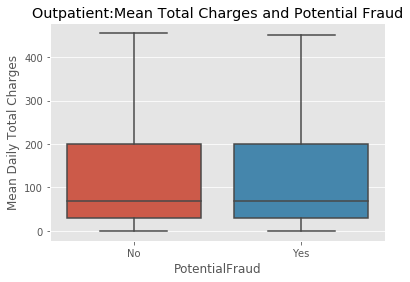

In [97]:
sns.boxplot(x='PotentialFraud', y='Mean Daily Total Charges', showfliers=False, \
            data=outpat_meantotal_fraud).set_title\
('Outpatient:Mean Total Charges and Potential Fraud')

Text(0.5, 1.0, 'Outpatient:Mean Total Charges and Potential Fraud')

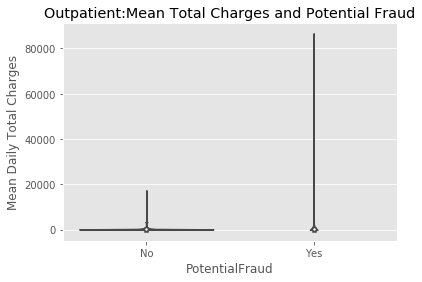

In [98]:
sns.violinplot(x='PotentialFraud', y='Mean Daily Total Charges', showfliers=False,\
               data=outpat_meantotal_fraud).set_title\
('Outpatient:Mean Total Charges and Potential Fraud')

In [99]:
log_mean = np.log10(outpat_meantotal_fraud['Mean Daily Total Charges'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Outpatient:Mean Total Charges and Potential Fraud')

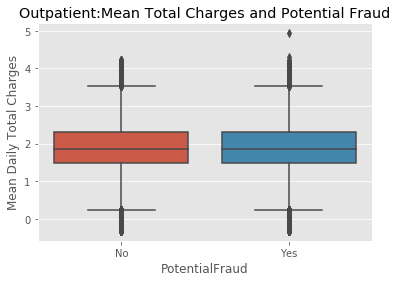

In [100]:
sns.boxplot(x='PotentialFraud', y=log_mean, \
            data=outpat_meantotal_fraud).set_title\
('Outpatient:Mean Total Charges and Potential Fraud')

In [102]:
inpat_provider_meantotalcharges = inpat1[['Provider', \
                                            'Mean Daily Total Charges']]

inpat_meantotal_fraud = pd.merge(train_potentialfraud, \
                                  inpat_provider_meantotalcharges, \
                                  on='Provider')

In [103]:
inpat_meantotal_fraud = inpat_meantotal_fraud.dropna()

Text(0.5, 1.0, 'Inpatient:Mean Total Charges and Potential Fraud')

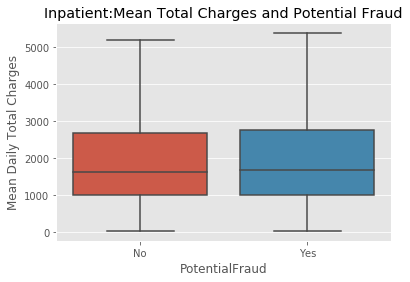

In [104]:
sns.boxplot(x='PotentialFraud', y='Mean Daily Total Charges', showfliers=False, \
            data=inpat_meantotal_fraud).set_title\
('Inpatient:Mean Total Charges and Potential Fraud')

In [105]:
log_mean_inpat = np.log10(inpat_meantotal_fraud['Mean Daily Total Charges'])

Text(0.5, 1.0, 'Inpatient:Mean Total Charges and Potential Fraud')

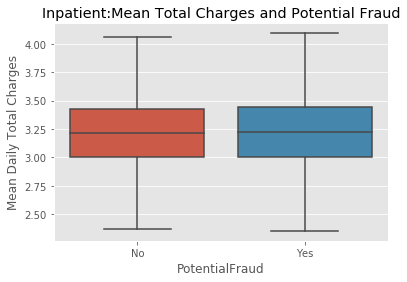

In [106]:
sns.boxplot(x='PotentialFraud', y=log_mean_inpat,showfliers=False, \
            data=inpat_meantotal_fraud).set_title\
('Inpatient:Mean Total Charges and Potential Fraud')

Text(0.5, 1.0, 'Inpatient:Mean Total Charges and Potential Fraud')

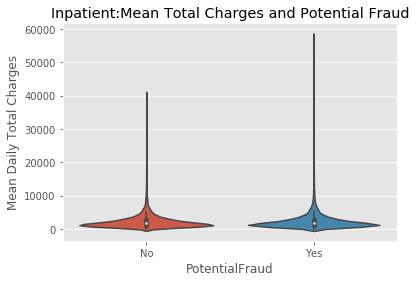

In [107]:
sns.violinplot(x='PotentialFraud', y='Mean Daily Total Charges', \
               data=inpat_meantotal_fraud).set_title\
('Inpatient:Mean Total Charges and Potential Fraud')

## Warmup Question 5 : From Which Providers Do the Duplicated Claims Come From?

### An easier type of frauds is to submit duplicated claims using stolen patient IDs. While multiple claims with identical information are not always fraudulent, the prevalence of these duplicated records would signal potential fraud activities.
### Consider the various diagnosis codes, procedure codes, admit diagnosis codes as the key features, please identify the duplicated claims in the inpatients_train, outpatients_train data.

In [123]:
# Dataframe of duplicated data for inpatients
inpatient_d = inpatient[inpatient.duplicated(['ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], keep = False)]
inpatient_d

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,AgeWhenServed
34,BENE11093,CLM32146,2009-01-03,2009-01-09,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,1,1,0,0,20180,1068,33210,5858,Yes,86
35,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,1,1,0,0,20180,1068,33210,5858,Yes,86
52,BENE11178,CLM40640,2009-03-01,2009-03-08,PRV57437,2000,PHY323517,NaN,NaN,2009-03-01,...,1,1,1,0,2000,1068,400,40,No,58
1039,BENE14664,CLM72395,2009-10-18,2009-11-01,PRV57334,15000,PHY386101,PHY385952,PHY345577,2009-10-18,...,1,0,0,0,15000,1068,1110,180,No,36
2021,BENE18047,CLM59863,2009-07-16,2009-07-21,PRV56793,8000,PHY375144,PHY410078,PHY397436,2009-07-16,...,1,0,1,0,33250,3204,1820,350,No,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39610,BENE156020,CLM31010,2008-12-01,2009-01-03,PRV52019,11000,PHY393952,PHY348831,PHY416093,2008-12-01,...,1,0,1,0,16320,2136,13460,1698,Yes,58
39612,BENE156020,CLM82204,2008-12-01,2009-01-06,PRV52019,11000,PHY393952,PHY348831,PHY416093,2008-12-01,...,1,0,1,0,16320,2136,13460,1698,Yes,58
39620,BENE156059,CLM63126,2009-08-08,2009-08-11,PRV52027,3000,PHY331910,NaN,NaN,2009-08-08,...,0,0,0,0,3090,1068,10,0,No,75
39817,BENE156866,CLM34949,2009-01-21,2009-01-27,PRV57409,20000,PHY415120,PHY423087,NaN,2009-01-21,...,1,0,1,0,76600,4272,26610,3478,Yes,98


In [124]:
# Dataframe of duplicated data for inpatients
inpatient_dd = inpatient[inpatient.duplicated(['BeneID', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], keep = False)]
inpatient_dd = pd.merge(inpatient_dd, train_potentialfraud, on = 'Provider', how = 'left')
inpatient_dd

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud_x,AgeWhenServed,PotentialFraud_y
0,BENE11093,CLM32146,2009-01-03,2009-01-09,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,1,0,0,20180,1068,33210,5858,Yes,86,Yes
1,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,1,0,0,20180,1068,33210,5858,Yes,86,Yes
2,BENE24807,CLM31703,2008-12-31,2009-01-09,PRV54111,13000,PHY360669,PHY408812,NaN,2008-12-31,...,1,1,0,17000,2136,13320,1148,Yes,70,Yes
3,BENE24807,CLM82212,2008-12-31,2009-01-11,PRV54111,13000,PHY360669,PHY408812,NaN,2008-12-31,...,1,1,0,17000,2136,13320,1148,Yes,70,Yes
4,BENE39346,CLM39007,2009-02-18,2009-02-23,PRV54065,19000,PHY337531,PHY341176,NaN,2009-02-18,...,0,1,0,19000,1068,19180,1708,Yes,68,Yes
5,BENE39346,CLM82211,2009-02-18,2009-02-26,PRV54065,19000,PHY337531,PHY341176,NaN,2009-02-18,...,0,1,0,19000,1068,19180,1708,Yes,68,Yes
6,BENE44545,CLM34340,2009-01-18,2009-01-25,PRV52843,14000,PHY365072,NaN,NaN,2009-01-18,...,0,1,1,14350,1068,14010,1068,Yes,74,Yes
7,BENE44545,CLM82209,2009-01-18,2009-01-27,PRV52843,14000,PHY365072,NaN,NaN,2009-01-18,...,0,1,1,14350,1068,14010,1068,Yes,74,Yes
8,BENE47786,CLM52970,2009-05-27,2009-06-01,PRV52828,14000,PHY391167,NaN,NaN,2009-05-27,...,0,1,0,18450,2136,17470,1488,Yes,38,Yes
9,BENE47786,CLM82208,2009-05-27,2009-06-04,PRV52828,14000,PHY391167,NaN,NaN,2009-05-27,...,0,1,0,18450,2136,17470,1488,Yes,38,Yes


In [125]:
# Dataframe of duplicated data for outpatients
outpatient_d = outpatient[outpatient.duplicated(['ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], keep = False)]
outpatient_d


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,AgeWhenServed
40475,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,NaN,...,1,0,0,0,0,0,90,40,No,72
40476,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,NaN,...,1,0,0,0,0,0,90,40,No,72
40477,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,NaN,...,1,1,1,0,0,0,1810,760,Yes,86
40479,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,NaN,...,1,1,1,0,0,0,1810,760,Yes,86
40483,BENE11004,CLM339500,2009-05-04,2009-05-16,PRV56011,500,PHY412904,NaN,PHY396473,NaN,...,1,1,1,0,0,0,1810,760,Yes,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558199,BENE159198,CLM172248,2009-02-02,2009-02-02,PRV53676,400,PHY361063,PHY361063,NaN,NaN,...,0,0,1,0,0,0,5470,1870,No,56
558200,BENE159198,CLM189011,2009-02-11,2009-02-11,PRV53672,3300,PHY390366,NaN,NaN,NaN,...,0,0,1,0,0,0,5470,1870,No,56
558201,BENE159198,CLM255268,2009-03-19,2009-03-19,PRV53672,70,PHY317739,PHY317739,PHY423886,NaN,...,0,0,1,0,0,0,5470,1870,No,56
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,0,0,1,0,0,0,5470,1870,No,57


In [126]:
outpatient_dd = outpatient[outpatient.duplicated(['BeneID', 'Provider', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], keep = False)]
outpatient_dd = pd.merge(outpatient_dd, train_potentialfraud, on = 'Provider', how = 'left')
outpatient_dd

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud_x,AgeWhenServed,PotentialFraud_y
0,BENE11548,CLM160269,2009-01-27,2009-01-27,PRV53269,100,PHY320803,NaN,NaN,NaN,...,1,0,0,3000,1068,3460,740,Yes,72,Yes
1,BENE11548,CLM677316,2009-11-12,2009-11-12,PRV53269,200,PHY424392,PHY354051,PHY313976,NaN,...,1,0,0,3000,1068,3460,740,Yes,73,Yes
2,BENE12467,CLM270911,2009-03-28,2009-03-28,PRV51740,10,PHY341784,NaN,NaN,NaN,...,0,1,0,0,0,720,940,No,77,No
3,BENE12467,CLM588795,2009-09-20,2009-09-20,PRV51740,30,PHY334410,NaN,NaN,NaN,...,0,1,0,0,0,720,940,No,77,No
4,BENE13237,CLM133571,2009-01-12,2009-01-12,PRV51369,800,PHY347064,PHY347064,NaN,NaN,...,1,0,0,0,0,940,230,Yes,76,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,BENE158263,CLM293261,2009-04-08,2009-04-08,PRV52310,10,PHY332888,NaN,NaN,NaN,...,1,0,0,0,1068,350,350,No,77,No
611,BENE158942,CLM552185,2009-08-29,2009-08-29,PRV54071,60,PHY359144,NaN,NaN,NaN,...,0,0,0,0,0,2610,690,No,68,No
612,BENE158942,CLM734018,2009-12-17,2009-12-17,PRV54071,200,PHY401484,NaN,PHY342961,NaN,...,0,0,0,0,0,2610,690,No,68,No
613,BENE159070,CLM161174,2009-01-27,2009-01-27,PRV55598,70,PHY364477,NaN,PHY364477,NaN,...,0,0,0,0,0,300,70,No,40,No


### Are these potentially fradulent providers duplicating their own medical records, or are they using the records from the other providers?

In [127]:
# totalpatient_d = Duplicated inpatient + Duplicated outpatient
totalpatient_d = pd.concat([inpatient_d, outpatient_d], axis=0)

In [128]:
# Total number of unique providers in duplicated data
len(totalpatient_d['Provider'].unique())

4794

In [129]:
# 18 providers that duplicate their own medical records for inpatient data
sum(inpatient_d['Provider'].value_counts() > 1)

18

In [130]:
# 50 providers using the records from the other providers for inpatient data
sum(inpatient_d['Provider'].value_counts() == 1)

50

In [131]:
# 4451 providers that duplicate their own medical records for outpatient data
sum(outpatient_d['Provider'].value_counts() > 1)

4451

In [132]:
# 335 providers using the records from the other providers for outpatient data
sum(outpatient_d['Provider'].value_counts() == 1)

335

### Assuming that the claimStartDates are authentic, identify the providers which are the information receivers. Identify the providers which are the information givers.

In [133]:
# totalpatient_d.groupby(["Provider"]).apply(lambda x: x.sort_values(["ClaimStartDt"]))

### Summarize the duplicate record counts/provider and study if the statistics have different distributions between honest and potentialfraud providers.

In [136]:
# Count of providers depending on whether they were labeled as potentially fraud or not
totalpatient_d.groupby(['PotentialFraud']).agg({'Provider' : 'nunique'})

,Provider
PotentialFraud,
No,4334
Yes,460


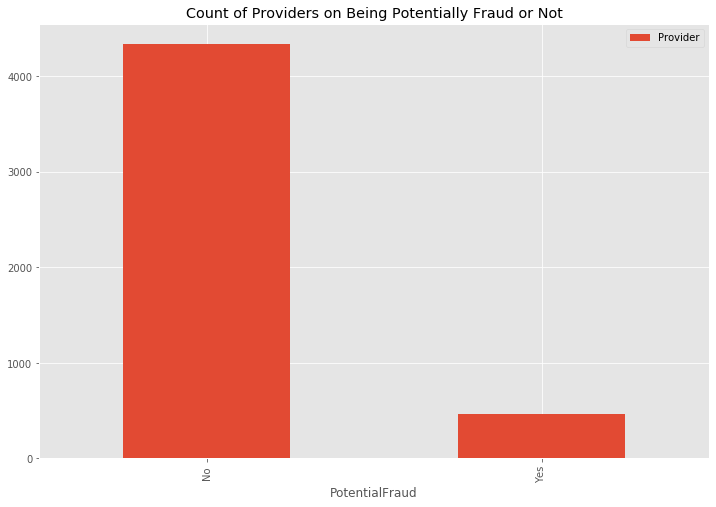

In [137]:
totalpatient_d.groupby(['PotentialFraud']).agg({'Provider' : 'nunique'}).plot(kind = 'bar', figsize = (12, 8), title = 'Count of Providers on Being Potentially Fraud or Not')


### Do these potentially fraud providers reuse doctor IDs and/or patient IDs? If so, these fradulent IDs (or if the doctors or patients willingly participate) can be used as signals to the other types of fraudulent activities.

In [139]:
# Potentially fraud cases from the complete train data
potential_fraud_providers = full_data.loc[full_data.PotentialFraud == 'Yes']

In [140]:
# Total of 83997 BeneIDs in all potentially fraud cases
potential_fraud_providers['BeneID'].nunique()

83997

In [141]:
# Total of 20592 attending physicials in all potentially fraud cases
potential_fraud_providers['AttendingPhysician'].nunique()

20592

In [142]:
# Potentially fraud cases from the duplicated diagnosis/procedure data
potential_fraud_d = totalpatient_d.loc[totalpatient_d.PotentialFraud == 'Yes']

In [143]:
# Out of 83997 all potentially fraud BeneIDs, 19337 were duplicated at least more than once
sum(potential_fraud_d['BeneID'].value_counts() > 1)


19337

In [144]:
# Out of 20592 all potentially fraud Attending Physician, 5990 were duplicated at least more than once
sum(potential_fraud_d['AttendingPhysician'].value_counts() > 1)


5990

### Do these duplicated records show any anomaly in terms of geographic locations? Even though the original data doesn't specify the providers nor the doctors' practice locations, one may use the majority of the patients' residence state/county information to infer their physical locations.

In [145]:
# Counts for each state for potentially fraud cases from duplicated data
totalpatient_d['State'].value_counts()

5     21045
10    15975
33    14395
45    13741
14    10051
39    10049
23     8928
36     8650
34     7772
11     6920
31     6512
49     6165
44     6037
15     5830
22     5617
26     5373
50     4911
21     4629
42     4375
18     4284
1      4108
52     4048
3      3872
19     3126
16     3118
24     3110
4      3082
6      3013
37     2821
25     2661
38     2296
7      2189
17     1971
51     1870
54     1771
28     1756
20     1629
32     1510
46     1402
13     1170
30     1084
43      816
29      796
27      792
12      775
47      771
8       606
41      473
53      457
35      394
2       285
9       224
Name: State, dtype: int64

In [146]:
# Counts for each county for potentially fraud cases from duplicated data
totalpatient_d['County'].value_counts()

200    6605
10     5586
20     5329
470    5052
60     5007
       ... 
931       2
14        2
562       1
804       1
712       1
Name: County, Length: 305, dtype: int64

### Base on your best knowledge of suspicious activities in duplicating the patient claims, flag the providers accordingly. Compare with the PotentialFraud flags offered by the dataset and discuss.

In [147]:
# Counts for each state for potentially fraud cases from all the training data 
potential_fraud_providers['State'].value_counts()

5     30335
10    17512
33    17492
39    11448
45    10135
31     9112
49     8613
23     8538
14     8509
22     7798
44     6709
36     6381
26     5301
50     4782
15     4635
34     4385
11     4123
6      3666
1      3525
24     3453
42     3180
16     2733
21     2576
46     2124
3      2030
52     1953
4      1945
37     1780
32     1739
19     1687
18     1679
7      1470
30     1184
20     1118
17     1016
54      957
13      858
25      819
38      770
8       612
27      576
28      516
53      478
51      466
29      429
47      402
43      316
12      308
2       207
9       178
41      156
35       82
Name: State, dtype: int64

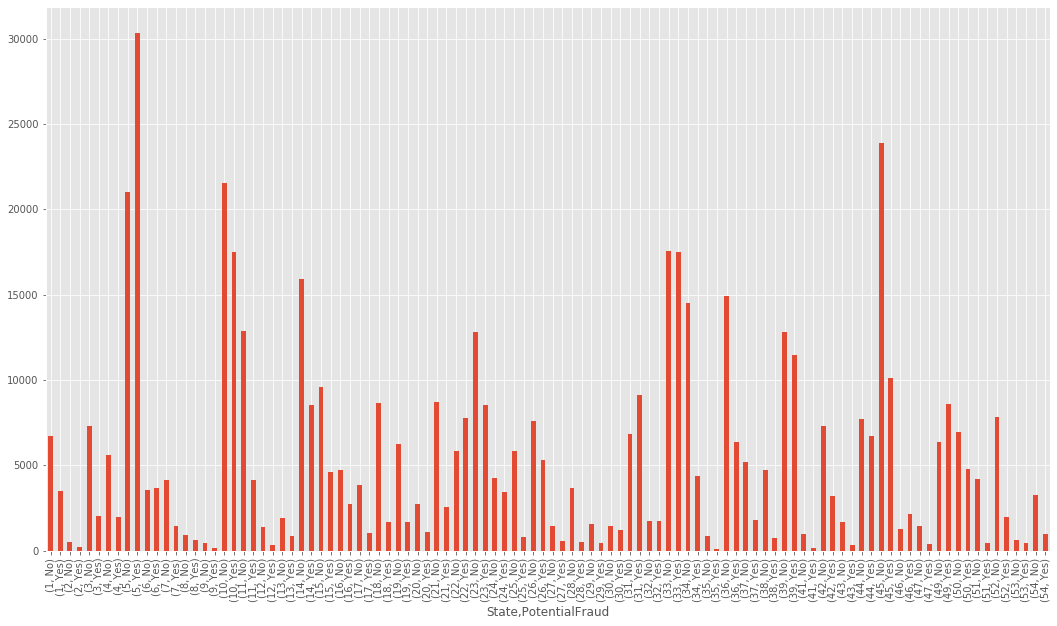

In [150]:
full_data.groupby(['State', 'PotentialFraud'])['PotentialFraud'].count().plot(kind = 'bar', figsize = (18, 10))


In [151]:
# Counts for each county for potentially fraud cases from all the training data 
potential_fraud_providers['County'].value_counts()

200    10078
470     7048
400     5962
590     5814
0       4897
       ...  
931        1
834        1
783        1
361        1
884        1
Name: County, Length: 271, dtype: int64

In [152]:
full_data.groupby(['County', 'PotentialFraud'])['PotentialFraud'].count()


County  PotentialFraud
0       No                 6584
        Yes                4897
1       No                    8
        Yes                   4
10      No                10750
                          ...  
994     Yes                  87
996     No                   13
        Yes                  56
999     No                  666
        Yes                 290
Name: PotentialFraud, Length: 582, dtype: int64

- For potentially fraud cases, whether it is duplicated or not, states #5, #10, #33 and county #200 seem to have the highest count